## Example of code to check similarity between vectors or strings

### Checking similarity between vectors

In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# vectors
a = np.array([1,2,3,1,2,3])
b = np.array([1,1,4, 1,2,3])
 
# manually compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)
 
# use library, operates on sets of vectors
aa = a.reshape(1,6)
ba = b.reshape(1,6)
cos_lib = cosine_similarity(aa, ba)
 
print(
    dot,
    norma,
    normb,
    cos,
    cos_lib[0][0]
)

29 5.291502622129181 5.656854249492381 0.9688220019325383 0.9688220019325384


### Checking similarity between strings (text)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# Define the documents
abstract_1 = 'While standing as one of the most widely considered and successful supervised classification algorithms, the k-nearest Neighbor (kNN) classifier generally depicts a poor efficiency due to being an instance-based method. In this sense, Approximated Similarity Search (ASS) stands as a possible alternative to improve those efficiency issues at the expense of typically lowering the performance of the classifier. In this paper we take as initial point an ASS strategy based on clustering. We then improve its performance by solving issues related to instances located close to the cluster boundaries by enlarging their size and considering the use of Deep Neural Networks for learning a suitable representation for the classification task at issue. Results using a collection of eight different datasets show that the combined use of these two strategies entails a significant improvement in the accuracy performance, with a considerable reduction in the number of distances needed to classify a sample in comparison to the basic kNN rule.'
abstract_2 = 'In this paper we present a new algorithm for parameter-free clustering by mode seeking. Mode seeking, especially in the form of the mean shift algorithm, is a widely used strategy for clustering data, but at the same time prone to poor performance if the parameters are not chosen correctly. We propose to form a clustering ensemble consisting of repeated and bootstrapped runs of the recent kNN mode seeking algorithm, an algorithm which is faster than ordinary mean shift and more suited for high dimensional data. This creates a robust mode seeking clustering algorithm with respect to the choice of parameters and high dimensional input spaces, while at the same inheriting all other strengths of mode seeking in general. We demonstrate promising results on a number of synthetic and real data sets.'
abstract_3 = 'This paper describes a framework for Dynamic Classifier Selection (DCS) whose novelty resides in its use of features that address the difficulty posed by the classification problem in terms of orienting both pool generation and classifier selection. The classification difficulty is described by meta-features estimated from problem data using complexity measures. Firstly, these features are used to drive the classifier pool generation expecting a better coverage of the problem space, and then, a dynamic classifier selection based on similar features estimates the ability of the classifiers to deal with the test instance. The rationale here is to dynamically select a classifier trained on a subproblem (training subset) having a similar level of difficulty as that observed in the neighborhood of the test instance defined in a validation set. A robust experimental protocol based on 30 datasets, and considering 20 replications, has confirmed that a better understanding of the classification problem difficulty may positively impact the performance of a DCS. For the pool generation method, it was observed that in 126 of 180 experiments (70.0%) adopting the proposed pool generator allowed an improvement of the accuracy of the evaluated DCS methods. In addition, the main results from the proposed framework, in which pool generation and classifier selection are both based on problem difficulty features, are very promising. In 165 of 180 experiments (91.6%), it was also observed that the proposed DCS framework based on the problem difficulty achieved a better classification accuracy when compared to 6 well known DCS methods in the literature.'
documents = [abstract_1, abstract_2, abstract_3]

In [11]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)
# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['abstract_1', 'abstract_2', 'abstract_3'])
df

,126,165,180,20,30,70,91,ability,accuracy,achieved,...,very,was,we,well,when,which,while,whose,widely,with
abstract_1,0,0,0,0,0,0,0,0,1,0,...,0,0,2,0,0,0,1,0,1,1
abstract_2,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,1,1,0,1,1
abstract_3,1,1,2,1,1,1,1,1,2,1,...,1,2,0,1,1,1,0,1,0,1


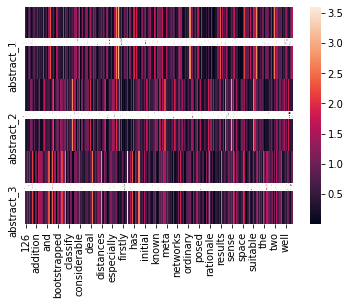

In [12]:
#Ploting heatmap
Index = ['abstract_1', 'abstract_2', 'abstract_3']
Cols = count_vectorizer.get_feature_names()
df = pd.DataFrame(abs(np.random.randn(3, 247)), index=Index, columns=Cols)
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
sns.heatmap(df, annot=True)
plt.show()

In [16]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.69319338 0.63263868]
 [0.69319338 1.         0.67289372]
 [0.63263868 0.67289372 1.        ]]
